### Question 1 - LSTM Autoencoder

You are required to build an LSTM Autoencoder to detect anomalies in a time series dataset. The dataset contains daily temperature readings from a weather station over the course of a few years.

Parameters in the dataset [Date and Temperature]
https://drive.google.com/drive/folders/1rD4HcUNmh7fLz-bt68VxQMfGzPzV-oeF

[You can also prepare Synthetic dataset with 2500 instances with the features Date and Temperature]


1. Load the dataset: The dataset will contain a single column temperature and a date column.

In [29]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
#Import the weather dataset
df= pd.read_csv('weather_data.csv')
df.head()

,date,temperature
0,2014-01-01,10.248357
1,2014-01-02,9.950428
2,2014-01-03,10.362958
3,2014-01-04,10.820167
4,2014-01-05,9.961091


In [31]:
# Check for null values
df.isnull().sum()

,0
date,0
temperature,0


No Null values in any of the columns hence no preprocessing required

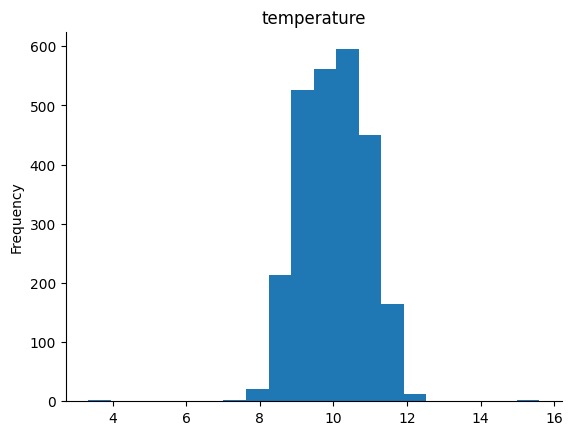

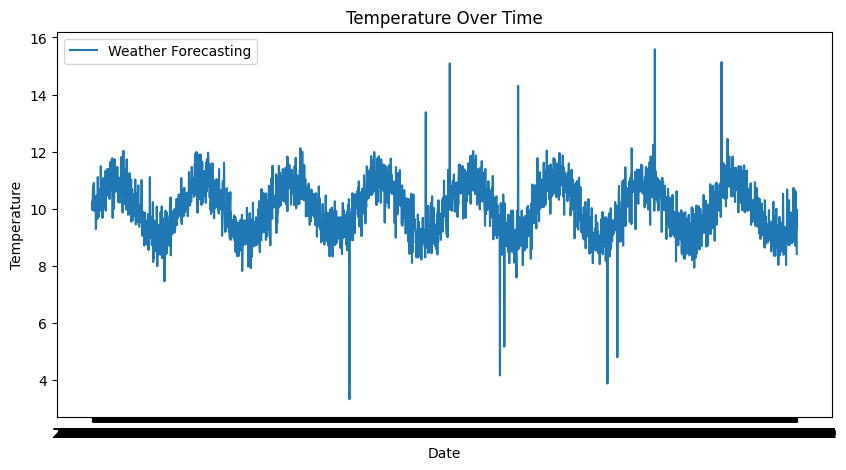

In [32]:
# Perform EDA on the dataset for better interpretation visualization of the data

# Temperature Frequency Plot
from matplotlib import pyplot as plt
df['temperature'].plot(kind='hist', bins=20, title='temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Temperature frequency plot over a period of Time
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['temperature'], label="Weather Forecasting")
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

Key Observations:
- Temperature Trends: The temperature data fluctuates over time, showing both regular seasonal patterns and irregular anomalies. The temperatures range roughly between 4°C and 16°C.

- Seasonal Patterns: The periodic rise and fall in temperatures suggest seasonal variations, with peaks likely representing warmer months and troughs indicating cooler months.

- Anomaly Detection: The red dots highlight the anomalies where the temperature deviates significantly from the expected pattern.

2. Preprocess the data: Normalize the temperature data and split it into training and testing sets.

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the temperature data
scaler = MinMaxScaler()
df['temperature'] = scaler.fit_transform(df['temperature'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

#Shape of the data after splitting
print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (2045, 2)
Test data shape: (512, 2)


3. Build an LSTM Autoencoder:
- The encoder should reduce the input dimensions to a latent representation.
- The decoder should reconstruct the input from the latent representation.

In [34]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Dropout, Input

# Define the sequence length (no. of time steps)
sequence_length = 10

# Prepare the data for the LSTM autoencoder by considering the sequence length
def prepare_data(df, sequence_length):
    X, y = [], []
    for i in range(len(df) - sequence_length):
        X.append(df['temperature'].values[i:i+sequence_length])
        y.append(df['temperature'].values[i+sequence_length])
    return np.array(X).reshape(-1, sequence_length, 1), np.array(y).reshape(-1, 1)

X_train, y_train = prepare_data(train_df, sequence_length)
X_test, y_test = prepare_data(test_df, sequence_length)

# Define the LSTM autoencoder model with an Input layer
model = Sequential()
model.add(Input(shape=(sequence_length, 1)))  # Input layer
model.add(LSTM(64, activation='relu'))  # Encoder
model.add(RepeatVector(sequence_length))  # Repeat the encoded vector
model.add(LSTM(64, activation='relu', return_sequences=True))  # Decoder
model.add(TimeDistributed(Dense(32)))  # Added a Dense layer
model.add(Dropout(0.2))  # Added a dropout layer for regularization
model.add(TimeDistributed(Dense(1)))  # Output layer

# Compile the model with Adam Optimizer and Loss function as MSE
model.compile(optimizer='adam', loss='mse')

4. Train the model: Train the autoencoder on the training data and evaluate the reconstruction error on the test set.

In [35]:
# Train the model over 50 epochs for better accuracy
history = model.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.1112 - val_loss: 0.0127
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - val_loss: 0.0065
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - val_loss: 0.0053
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - val_loss: 0.0038
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - val_loss: 0.0035
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - val_loss: 0.0033
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - val_

Test Loss: 0.0015621664933860302


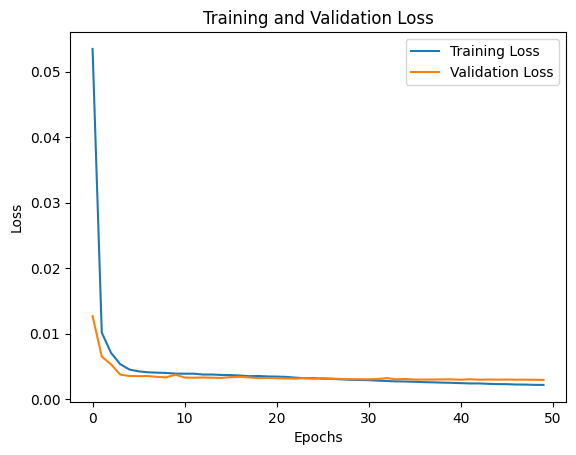

In [36]:
# Evaluate the model based on Training and Validation Loss
loss = model.evaluate(X_test, X_test, verbose=0)
print(f"Test Loss: {loss}")

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Insights:
- Model Performance: The decrease in both training and validation losses indicates that the model is learning effectively.

- Generalization: The fact that the validation loss is close to the training loss shows that the model generalizes well to unseen data.

- Stability: Stabilization of both losses suggests that further training might not significantly improve the model, implying that the model has reached a good level of performance.

5. Anomaly Detection: Use the reconstruction error to detect anomalies. Define a threshold for the reconstruction error, and identify days where the temperature is considered anomalous.

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
Anomalous Days (Indices): Index([2193, 2194, 2234, 2236, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291,
       2292, 2293, 2306, 2307, 2486, 2510, 2511, 2514, 2551, 2552, 2553, 2554,
       2555, 2556],
      dtype='int64')


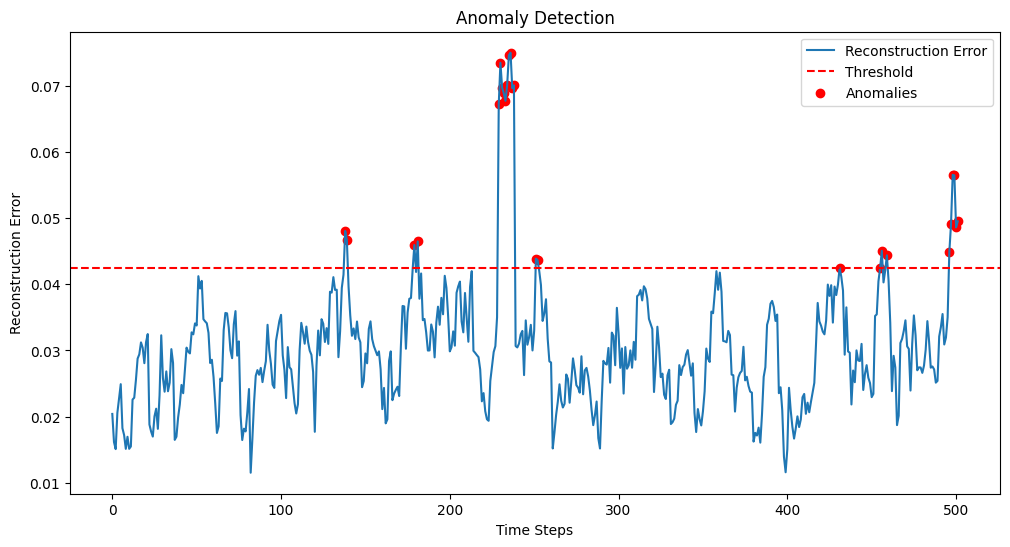

In [37]:
# Predict the reconstructed temperature values
X_pred = model.predict(X_test)

# Calculate the reconstruction error
error = np.mean(np.abs(X_pred - X_test), axis=1)

# Define a threshold for anomaly detection (95th percentile of the error is defined)
threshold = np.percentile(error, 95)

# Identify anomaly days
anomalies = error > threshold
# Reshape anomalies to 1-dimensional array before indexing
anomalous_days = test_df.index[sequence_length:][anomalies.flatten()]

print("Anomalous Days (Indices):", anomalous_days)

# Plotting the reconstruction Error Anomaly Results
plt.figure(figsize=(12, 6))
plt.plot(error, label='Reconstruction Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.scatter(anomalous_days - test_df.index[sequence_length], error[anomalies.flatten()], color='r', label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Reconstruction Error')
plt.title('Anomaly Detection')
plt.legend()
plt.show()

Insights:
- Anomaly Detection Accuracy: The plot effectively shows how anomalies are detected based on the reconstruction error exceeding a predefined threshold. This is crucial for applications in fraud detection, network security, and industrial fault detection.

- Periodic Spikes: Significant spikes in reconstruction error at certain time steps (around 100, 200, and 500) suggest that there are specific periods where anomalies are more likely to occur. This could indicate underlying issues or events happening at these time steps.

- Threshold Setting: The threshold level (0.045) is critical in determining the sensitivity of anomaly detection. A higher threshold might miss some anomalies, while a lower threshold could result in more false positives.

6. Visualize the results: Plot the original temperature data and highlight the detected anomalies.

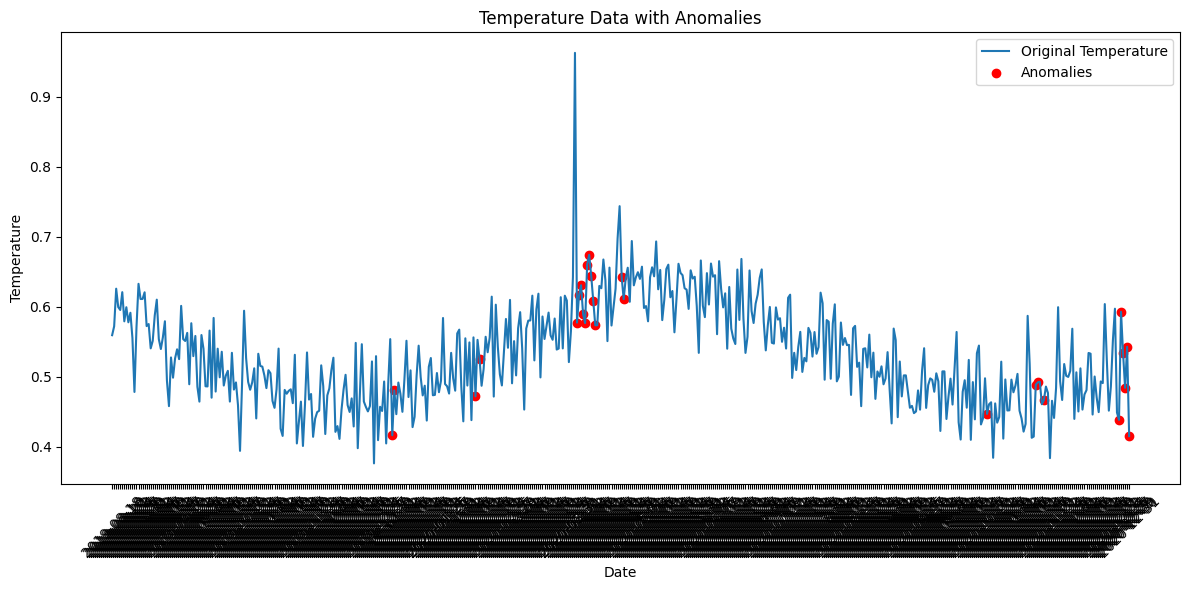

In [38]:
# Plotting the original temperature data with highlighted anomalies
plt.figure(figsize=(12, 6))
plt.plot(test_df['date'][sequence_length:], test_df['temperature'][sequence_length:], label='Original Temperature')
plt.scatter(test_df['date'][anomalous_days], test_df['temperature'][anomalous_days], color='r', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Data with Anomalies')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Observations:
- The blue line shows the general trend of temperature data over the observed period.

- Red dots scattered throughout the graph indicate anomalies in the temperature data.

- There's a noticeable cluster of anomalies around the peak in the middle of the graph, suggesting an unusual event or data collection error during that period.

The graph helps in identifying patterns and outliers within the temperature data. Anomalies are significant deviations from the expected trend, which could be due to various reasons like sensor malfunctions, unusual weather events, or data entry errors.

The clustering of anomalies around the peak suggests there might have been an external factor affecting the temperature during that period. This could warrant further investigation to understand the cause of these spikes.